# SnowExSQL Database 


[SnowEx](https://snow.nasa.gov/campaigns/snowex) has introduced a unique opportunity to study SWE in a way that's unprecedented, but with more data comes new challenges. 

![examples](./images/snowex_database/data_examples.png)


<!-- 
<img src="https://snowexsql.readthedocs.io/en/latest/_images/gallery_overview_example_12_0.png" alt="Grand Mesa Overview" width="1000px"> -->

**The SnowEx database is a resource that shortcuts the time it takes to ask cross dataset questions**

      
- Standardizing diverse data
- Cross referencing data
- Provenance!
- Added GIS functionality
- Connect w/ ArcGIS or QGIS!
      
      

## What's in it?

* Snow pits - Density, hardness profiles, grain types + sizes
* Manual snow depths - TONS of depths (Can you say spirals?)
* Snow Micropenetrometer (SMP) profiles - (Subsampled to every 100th)
* Snow depth + SWE rasters from ASO Inc.
* GPR
* Pit site notes
* Camera Derived snow depths
* Snow off DEM from USGS 3DEP 
* And almost all the associated metadata

## Technically, what is it?

* PostgreSQL database
* PostGIS extension
* Supports vector and raster data
* And a host of GIS operations
* AND NOW WITH API!


### So what's the catch?
New tech can create barriers...

```{figure} ./images/snowex_database/pits_not_bits.jpg
:scale: 20 %
:alt: pits not bits
```

### TL;DR Do less wrangling, do more crunching. 

## How do I get at this magical box of data ?
* [SQL](https://www.postgresql.org/docs/13/tutorial-sql.html) 
* [snowexsql](https://github.com/SnowEx/snowexsql/) <span style="font-size:20pt;"> **&#8592; 😎**</span>


### Welcome to API Land

In [ ]:
from snowexsql.api import PointMeasurements

df = PointMeasurements.from_filter(type="depth", instrument='pit ruler', limit=100)
df.plot(column='value', cmap='jet', vmin=10, vmax=150)
df

# How is the Database Structured?

The goal of the database is to hold as much of the SnowEx data in one place and make it easier to 
do research with. With that in mind follow the steps below to see how the the data base is structured.

## Where do datasets live (i.e. tables)?

Data in the database lives in 1 of 4 places. 


```{figure} ./images/snowex_database/structure.png
:scale: 50 %
:alt: Structure of the snowex db

Layout of the database tables

```

The 4th table is a table detailing the site information. Lots and lots of metadata for which the API has not been written yet.

So how does this look in python?

In [3]:
from snowexsql.api import PointMeasurements, LayerMeasurements, RasterMeasurements

## How are tables structured?
Each table consists of rows and columns. Below are the available columns!

In [8]:
# Import the class reflecting the points table in the db
from snowexsql.api import PointMeasurements as measurements

# Grab one measurement to see what attributes are available
df = measurements.from_filter(type="depth", limit=1)

# Print out the results nicely
print("These are the available columns in the table:\n \n* {}\n".format('\n* '.join(df.columns)))

These are the available columns in the table:
 
* version_number
* equipment
* value
* latitude
* longitude
* northing
* easting
* elevation
* utm_zone
* geom
* time
* site_id
* site_name
* date
* time_created
* time_updated
* id
* doi
* date_accessed
* instrument
* type
* units
* observers



# Forming Queries through the API!

Get familiar with the tools available for querying the database. The simplest way is to use the api classes 
* [`snowexsql.api.PointMeasurements`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L185)
* [`snowexsql.api.LayerMeasurements`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L262)

* Each class has to very useful functions
  1. [`from_filter`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L192)
  2. [`from_area`](https://github.com/SnowEx/snowexsql/blob/830fa76de8cf13c5101e1b4b663c1b399f81d7e6/snowexsql/api.py#L210)

                    value
site_id                  
Banner Open    235.500000
Banner Snotel  216.666667
Bogus Upper    260.625000


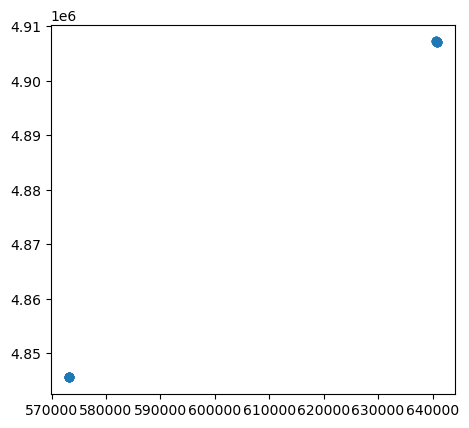

In [11]:
# Import in our two classes to access the db
from snowexsql.api import LayerMeasurements
from datetime import datetime 

# Find some density pit measurements at the Boise site in december 2019.
df = LayerMeasurements.from_filter(
    type="density",
    site_name="Boise River Basin",
    date_less_equal=datetime(2020, 1, 1),
    date_greater_equal=datetime(2019, 12, 1),
)

# Plot Example!
df.plot()

# Show off the dataframe
df

# Analysis Example - Find the bulk density 
df['value'] = df['value'].astype(float)
print(df[['site_id', 'value']].groupby(by='site_id').mean())

An alternative function is `from_area`, which subsets the data within a given distance of a point.

,depth,site_id,pit_id,bottom_depth,comments,sample_a,sample_b,sample_c,value,flags,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,84.0,1C5,COGM1C5_20200212,None,None,None,None,None,45.6,None,...,2020-02-12,2024-08-15 20:03:26.508508+00:00,None,2407961,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
1,79.0,1C5,COGM1C5_20200212,None,None,None,None,None,38.2,None,...,2020-02-12,2024-08-15 20:03:26.508508+00:00,None,2407962,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
2,74.0,1C5,COGM1C5_20200212,None,None,None,None,None,24.5,None,...,2020-02-12,2024-08-15 20:03:26.508508+00:00,None,2407963,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
3,69.0,1C5,COGM1C5_20200212,None,None,None,None,None,23.5,None,...,2020-02-12,2024-08-15 20:03:26.508508+00:00,None,2407964,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
4,64.0,1C5,COGM1C5_20200212,None,None,None,None,None,22.4,None,...,2020-02-12,2024-08-15 20:03:26.508508+00:00,None,2407965,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Kate Hale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,28.0,1C1,COGM1C1_20200131,None,None,None,None,None,13.1,None,...,2020-01-31,2024-08-15 20:03:31.924769+00:00,None,2410266,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi
156,23.0,1C1,COGM1C1_20200131,None,None,None,None,None,10.1,None,...,2020-01-31,2024-08-15 20:03:31.924769+00:00,None,2410267,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi
157,18.0,1C1,COGM1C1_20200131,None,None,None,None,None,10.6,None,...,2020-01-31,2024-08-15 20:03:31.924769+00:00,None,2410268,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi
158,13.0,1C1,COGM1C1_20200131,None,None,None,None,None,10.5,None,...,2020-01-31,2024-08-15 20:03:31.924769+00:00,None,2410269,https://doi.org/10.5067/SNMM6NGGKWIT,2022-06-30,IS3-SP-11-01F,specific_surface_area,None,Juha Lemmetyinen & Ioanna Merkouriadi


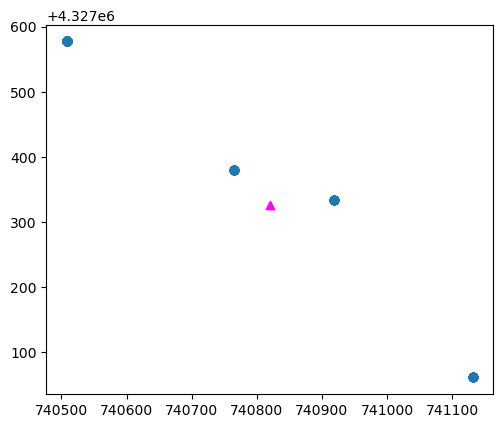

In [12]:
# Import our api class
import geopandas as gpd 

# import some gis functionality 
from shapely.geometry import Point 

# Find some SSA measurements within a distance of a known point
pnt = Point(740820.624625,4.327326e+06)
df = LayerMeasurements.from_area(pt=pnt, crs=26912, buffer=500,
    type='specific_surface_area')

# plot up the results
ax = df.plot()

# plot the site so we can see how close everything is.
site = gpd.GeoDataFrame(geometry=[pnt], crs=26912)
site.plot(ax=ax, marker='^', color='magenta')

# show off the dataframe
df

## How do I know what to filter on?
There are tools for that! Each class has a host of functions that start with `all_*` these function return the unique value in that column. 

 * `all_types` - all the data types e.g. depth, swe, density...
 * `all_instruments` - all instruments available in the table
 * `all_dates` - all dates listed in the table
 * `all_site_names` - all the site names available in the table. e.g. Grand Mesa

In [13]:
from snowexsql.api import PointMeasurements

# Instantiate the class to use the properties!
measurements = PointMeasurements()

# Get the unique data names/types in the table
results = measurements.all_types
print('Available types = {}'.format(', '.join([str(r) for r in results])))

# Get the unique instrument in the table
results = measurements.all_instruments
print('\nAvailable Instruments = {}'.format(', '.join([str(r) for r in results])))

# Get the unique dates in the table
results = measurements.all_dates
print('\nAvailable Dates = {}'.format(', '.join([str(r) for r in results])))

# Get the unique site names in the table
results = measurements.all_site_names
print('\nAvailable sites = {}'.format(', '.join([str(r) for r in results])))

Available types = two_way_travel, snow_void, density, swe, depth

Available Instruments = mesa, magnaprobe, camera, pulseEkko pro 1 GHz GPR, Mala 1600 MHz GPR, None, Mala 800 MHz GPR, pulse EKKO Pro multi-polarization 1 GHz GPR, pit ruler

Available Dates = 2020-05-28, 2020-01-09, 2021-03-19, 2020-05-23, 2020-01-04, 2019-11-29, 2019-10-20, 2019-11-30, 2021-01-28, 2020-04-17, 2021-02-19, 2020-02-19, 2020-02-26, 2020-02-03, 2019-10-05, 2020-05-05, 2019-12-29, 2019-10-28, 2020-06-02, 2020-01-30, 2020-05-22, 2020-03-09, 2019-12-09, 2019-12-28, 2020-02-24, 2020-03-17, 2021-03-18, 2020-04-01, 2019-10-29, 2019-10-14, 2020-05-14, 2019-10-02, 2020-01-31, 2020-04-18, 2019-10-12, 2020-04-29, 2020-04-26, 2021-03-03, 2021-01-15, 2020-02-23, 2020-01-22, 2020-01-01, 2019-11-21, 2020-05-10, 2023-03-13, 2020-02-12, 2019-11-19, 2020-05-06, 2019-10-25, 2019-11-02, 2020-02-08, 2020-04-14, 2019-11-16, 2020-04-02, 2020-04-07, 2021-03-21, 2021-04-21, 2023-03-15, 2020-11-25, 2019-12-27, 2021-01-27, 2019-10-01

### More specific filtering options
Sometimes we need a bit more filtering to know more about what I can filter on. Questions like "What dates was the SMP used?" are a bit more complicated than "Give me all the dates for snowex"

The good news is, we have tool for that! `from_unique_entries` is your friend!

In [14]:
# import layer measurements
from snowexsql.api import LayerMeasurements

# Query dates where SMP was used
LayerMeasurements.from_unique_entries(['date'], instrument='snowmicropen')

[datetime.date(2020, 2, 4),
 datetime.date(2020, 2, 3),
 datetime.date(2020, 1, 30),
 datetime.date(2020, 2, 1),
 datetime.date(2020, 2, 6),
 datetime.date(2020, 1, 31),
 datetime.date(2020, 2, 12),
 datetime.date(2020, 2, 8),
 datetime.date(2020, 2, 5),
 datetime.date(2020, 1, 28),
 datetime.date(2020, 2, 11),
 datetime.date(2020, 2, 10),
 datetime.date(2020, 1, 29)]

## Query Nuances
### Limit size 
To avoid accidental large queries, we have added some bumper rails. By default if you ask for more than 1000 records then an error will pop up unless you explicitly say you want more. 

**Try This**: Do a large query. Run the code block below without the limit keyword argument ("kwarg"):

In [ ]:
# Import PointMeasurements
from snowexsql.api import PointMeasurements

# Query db using a vague filter or on a huge dataset like GPR but remove the limit kwarg
df = PointMeasurements.from_filter(type='two_way_travel', limit=100)

# Show the dataframe
df

We have added this on the db to allow you to explore without accidentally pulling the entire SnowEx universe down. If you know you want a large query (defined as > 1000) then use the `limit = ####` option in the `from_filter` or `from_area` function.

**Warning** - It is better to filter using other things besides the limit because the limit is not intelligent. It will simply limit the query by the order of entries that were submitted AND fits your filter. So if you encounter this then consider how to tighten up the filter.

### List of Criteria
You can use lists in your requests too!

In [ ]:
# Import layer measurements
from snowexsql.api import LayerMeasurements

# Grab all the data that used the one of these instruments (hint hint SSA)
ssa_instruments = ["IS3-SP-15-01US", "IRIS",  "IS3-SP-11-01F"]

# Query the DB (throw a limit for safety)
LayerMeasurements.from_filter(instrument=ssa_instruments, limit=100)

### Greater than or Less than
Sometimes we want to isolate certain ranges of value or even dates. The `greater_equal` and `less_equal` terms can be added on to `value` or `dates`. 

* `date_greater_equal`
* `date_less_equal`
* `value_greater_equal`
* `value_less_equal`
 

In [16]:
# Import the point measurements class
from snowexsql.api import PointMeasurements

# Filter values > 100 cm from the pulse ecko GPR
df = PointMeasurements.from_filter(value_greater_equal=100, type='depth', instrument='pulse EKKO Pro multi-polarization 1 GHz GPR', limit=100)

# Show off the dataframe
df

,version_number,equipment,value,latitude,longitude,northing,easting,elevation,utm_zone,geom,...,date,time_created,time_updated,id,doi,date_accessed,instrument,type,units,observers
0,None,None,101.096736,39.034358,-108.190907,4.324345e+06,743146.962029,None,12,POINT (743146.962 4324344.879),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320356,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
1,None,None,101.096736,39.034358,-108.190907,4.324345e+06,743146.933029,None,12,POINT (743146.933 4324344.839),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320357,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
2,None,None,103.532801,39.034350,-108.190913,4.324344e+06,743146.462029,None,12,POINT (743146.462 4324343.986),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320378,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
3,None,None,104.750834,39.034350,-108.190913,4.324344e+06,743146.454029,None,12,POINT (743146.454 4324343.945),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320379,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
4,None,None,104.750834,39.034350,-108.190913,4.324344e+06,743146.447029,None,12,POINT (743146.447 4324343.904),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320380,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,None,None,109.622966,39.034313,-108.190909,4.324340e+06,743146.897029,None,12,POINT (743146.897 4324339.877),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320471,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
96,None,None,109.622966,39.034313,-108.190909,4.324340e+06,743146.915029,None,12,POINT (743146.915 4324339.839),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320472,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
97,None,None,108.404933,39.034313,-108.190909,4.324340e+06,743146.934029,None,12,POINT (743146.934 4324339.802),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320473,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan
98,None,None,108.404933,39.034312,-108.190909,4.324340e+06,743146.953029,None,12,POINT (743146.953 4324339.764),...,2020-01-28,2022-07-05 16:45:41.402741+00:00,None,1320474,https://doi.org/10.5067/Q2LFK0QSVGS2,2022-06-30,pulse EKKO Pro multi-polarization 1 GHz GPR,depth,cm,Tate Meehan


## Additional Resources

[snowexsql](https://github.com/SnowEx/snowexsql/) has a host of resources for you to  help your self. First when you are looking for something be sure to check the snowexsql's docs.
There you will find notes on the database structure. datasets, and of course our new API! 

### Database Usage/Examples
* [snowexsql Code](https://github.com/SnowEx/snowexsql/) 
* [snowexsql Documentation](https://snowexsql.readthedocs.io/en/latest/) 

### Database Building/Notes
* [snowex_db Code](https://github.com/SnowEx/snowex_db/) 
* [snowex_db Documentation](https://snowex_db.readthedocs.io/en/latest/) 